In [1]:
import pickle

import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix, hstack
from sklearn.linear_model import LogisticRegression as glm
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,

In [2]:
train_df=pd.read_csv('train_sessions.csv')

In [3]:
test_df=pd.read_csv('test_sessions.csv')

In [4]:
train_df[[x for x in list(train_df) if 'time' in x]]=train_df[[x for x in list(train_df) if 'time' in x]].apply(pd.to_datetime)

In [5]:
test_df[[x for x in list(test_df) if 'time' in x]]=test_df[[x for x in list(test_df) if 'time' in x]].apply(pd.to_datetime)

In [6]:
sites = ["site%s" % i for i in range(1, 11)]
train_df[sites] = train_df[sites].fillna(0).astype("int")
test_df[sites] = test_df[sites].fillna(0).astype("int")

In [7]:
site_dict=pickle.load(open('site_dic.pkl','rb'))

In [8]:
sites_dict_df = pd.DataFrame(
    list(site_dict.keys()), index=list(site_dict.values()), columns=["site"]
)

In [9]:
full_df=pd.concat([train_df,test_df])

In [10]:
sites=full_df.filter(like='site',axis=1)

In [11]:
from scipy.sparse import csr_matrix

In [12]:
# последовательность с индексами
sites_flatten = sites.values.flatten()

# искомая матрица
full_sites_sparse = csr_matrix(
    (
        [1] * sites_flatten.shape[0],
        sites_flatten,
        range(0, sites_flatten.shape[0] + 10, 10),
    )
)[:, 1:]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.metrics import roc_auc_score

In [15]:
new_train=pd.DataFrame(index=train_df.index)

In [16]:
new_train['data']=train_df.data

AttributeError: 'DataFrame' object has no attribute 'data'

In [17]:
train_df['data']=pd.DatetimeIndex(train_df.time1).year*100+pd.DatetimeIndex(train_df.time1).month


In [18]:
test_df['data']=pd.DatetimeIndex(test_df.time1).year*100+pd.DatetimeIndex(test_df.time1).month


In [20]:
new_test=pd.DataFrame(index=test_df.index)
new_test['data']=test_df.data

In [21]:
full_df['data']=pd.DatetimeIndex(full_df.time1).year*100+pd.DatetimeIndex(full_df.time1).month

In [24]:
sites['data']=full_df[:sh]['data']

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [25]:
sites['data']=(sites['data']-sites['data'].mean())/sites['data'].std()

In [26]:
sites

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,data
0,718,0,0,0,0,0,0,0,0,0,0.634238
1,890,941,3847,941,942,3846,3847,3846,1516,1518,0.634238
2,14769,39,14768,14769,37,39,14768,14768,14768,14768,-1.485867
3,782,782,782,782,782,782,782,782,782,782,0.657795
4,22,177,175,178,177,178,175,177,177,178,0.634238
...,...,...,...,...,...,...,...,...,...,...,...
82792,812,1039,676,0,0,0,0,0,0,0,0.657795
82793,300,302,302,300,300,1222,302,1218,1221,1216,0.657795
82794,29,33,35,22,37,6779,30,21,23,6780,-1.485867
82795,5828,23,21,804,21,3350,23,894,21,961,0.610681


In [76]:
y_train=train_df['target']

In [23]:
sh=train_df.shape[0]

sites['start_month']=pd.DatetimeIndex(full_df.time1).month

sites['start_hour']=pd.DatetimeIndex(full_df.time1).hour

sites['morning']=(pd.DatetimeIndex(full_df.time1).hour<=11)

In [31]:
sites.morning=sites.morning.map({True:1,False:0})

In [32]:
X_train=full_sites_sparse[:train_df.shape[0]]

In [33]:
X_test=full_sites_sparse[train_df.shape[0]:]

In [34]:
X_train_new=hstack([X_train,sites.iloc[:sh,[11,12,13]]])
X_test_new=hstack([X_test,sites.iloc[sh:,[11,12,13]]])

In [35]:
sites

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,data,start_month,start_hour,morning
0,718,0,0,0,0,0,0,0,0,0,0.634238,2,10,1
1,890,941,3847,941,942,3846,3847,3846,1516,1518,0.634238,2,11,1
2,14769,39,14768,14769,37,39,14768,14768,14768,14768,-1.485867,12,16,0
3,782,782,782,782,782,782,782,782,782,782,0.657795,3,10,1
4,22,177,175,178,177,178,175,177,177,178,0.634238,2,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82792,812,1039,676,0,0,0,0,0,0,0,0.657795,10,18,0
82793,300,302,302,300,300,1222,302,1218,1221,1216,0.657795,5,14,0
82794,29,33,35,22,37,6779,30,21,23,6780,-1.485867,5,11,1
82795,5828,23,21,804,21,3350,23,894,21,961,0.610681,5,10,1


In [125]:
def get_auc_lr_valid(X, y, alpha=1.0, ratio=0.9, seed=17):
    fit=Ridge(alpha=alpha,random_state=17,max_iter=10000)
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=ratio)
    fit.fit(X_train,y_train)
    prob=fit.predict(X_test)
    print(roc_auc_score(y_test,prob))

In [40]:
get_auc_lr_valid(X_train_new,y_train)

0.9798666507348548 1.0


In [42]:
from sklearn.ensemble import BaggingClassifier

In [43]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV 

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [57]:
from sklearn import metrics

In [50]:
parametrs_f={'n_estimators':range(1,100,10),'max_depth':range(1,10,2),'min_samples_leaf':range(1,10,2),'min_samples_split':range(5,20,5)}

In [67]:
rf=RandomForestClassifier(max_depth=6,min_samples_split=10,min_samples_leaf=8,random_state=17)

In [63]:
search=RandomizedSearchCV(rf,parametrs_f,scoring='roc_auc',n_jobs=-1)

In [90]:
search.fit(X_train_new,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=17), n_jobs=-1,
                   param_distributions={'max_depth': range(1, 10, 2),
                                        'min_samples_leaf': range(1, 10, 2),
                                        'min_samples_split': range(5, 20, 5),
                                        'n_estimators': range(1, 100, 10)},
                   scoring='roc_auc')

In [132]:
b_f=search.best_estimator_

In [84]:
pred=rf.predict_proba(X_train)[:,1]

In [86]:
pred

array([0.00853648, 0.00930405, 0.00853648, ..., 0.00853648, 0.0080249 ,
       0.00883127])

In [87]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
253556    0
253557    0
253558    0
253559    0
253560    0
Name: target, Length: 253561, dtype: int64

In [120]:
ridge=Ridge(random_state=17,alpha=10)

In [121]:
ridge.fit(X_train_new,y_train)

Ridge(alpha=10, random_state=17)

In [122]:
roc_auc_score(y_train,ridge.predict(X_train_new))

0.9724386501413503

In [129]:
get_auc_lr_valid(X_train_new,y_train,5)

0.957955736515359


In [157]:
param = { "C": [0.0001, 0.001, 0.01, 1, 10, 100]}

In [134]:
pred=b_f.predict_proba(X_test_new)[:,1]

In [135]:
pd.DataFrame({'session_id':test_df.session_id,'target':pred}).to_csv('predn.csv',index=False)

In [141]:
fit=glm()

In [158]:
f=glm(random_state=17,max_iter=10000)

In [159]:
grid_search = GridSearchCV(f, param, n_jobs=-1, scoring ='roc_auc', cv=skf)

In [160]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, random_state=17),
             n_jobs=-1, param_grid={'C': [0.0001, 0.001, 0.01, 1, 10, 100]},
             scoring='roc_auc')

In [162]:
grid_search.best_estimator_

LogisticRegression(C=1, max_iter=10000, random_state=17)

In [144]:
fit.fit(X_train_new,y_train)

LogisticRegression(C=1, max_iter=10000, random_state=17)

In [145]:
pred=fit.predict_proba(X_test_new)[:,1]

In [146]:
pd.DataFrame({'session_id':test_df.session_id,'target':pred}).to_csv('predn.csv',index=False)

In [357]:
X_test_new

<82797x48373 sparse matrix of type '<class 'numpy.int64'>'
	with 902864 stored elements in COOrdinate format>

In [349]:
sites

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,time,start_hour,morning
21668,56,55,0,0,0,0,0,0,0,0,-2.079073,8,1
54842,56,55,56,55,0,0,0,0,0,0,-2.079073,8,1
77291,946,946,951,946,946,945,948,784,949,946,-2.079073,8,1
114020,945,948,949,948,945,946,947,945,946,946,-2.079073,8,1
146669,947,950,948,947,950,952,946,951,946,947,-2.079073,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82792,812,1039,676,0,0,0,0,0,0,0,0.678631,18,0
82793,300,302,302,300,300,1222,302,1218,1221,1216,0.552131,14,0
82794,29,33,35,22,37,6779,30,21,23,6780,0.552131,11,1
82795,5828,23,21,804,21,3350,23,894,21,961,0.552131,10,1


In [367]:
sites

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,time,start_hour,morning,start_month
21668,56,55,0,0,0,0,0,0,0,0,-2.079073,8,1,1
54842,56,55,56,55,0,0,0,0,0,0,-2.079073,8,1,1
77291,946,946,951,946,946,945,948,784,949,946,-2.079073,8,1,1
114020,945,948,949,948,945,946,947,945,946,946,-2.079073,8,1,1
146669,947,950,948,947,950,952,946,951,946,947,-2.079073,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82792,812,1039,676,0,0,0,0,0,0,0,0.678631,18,0,10
82793,300,302,302,300,300,1222,302,1218,1221,1216,0.552131,14,0,5
82794,29,33,35,22,37,6779,30,21,23,6780,0.552131,11,1,5
82795,5828,23,21,804,21,3350,23,894,21,961,0.552131,10,1,5


In [374]:
for m in np.logspace(-3,1,10):
    get_auc_lr_valid(X_train_new,y_train,C=m)
    

0.8948142253346774 0.001
0.9189368440375654 0.0027825594022071257
0.925808142959514 0.007742636826811269
0.9524754292737883 0.021544346900318832
0.9663049319840795 0.05994842503189409
0.9786446009083913 0.1668100537200059
0.9798014155157012 0.46415888336127775
0.977061084871028 1.2915496650148828
0.9863374816004282 3.593813663804626
0.9815566531166554 10.0


In [375]:
fit=glm(C=3.593813663804626,random_state=17,max_iter=10000)

In [376]:
fit.fit(X_train_new,y_train)

LogisticRegression(C=3.593813663804626, max_iter=10000, random_state=17)

In [381]:
pd.DataFrame({'session_id':test_df.session_id,'target':fit.predict_proba(X_test_new)[:,1]}).to_csv('predn.csv',index=False)

In [1]:
import numpy as np
import pandas as pd
import scipy
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
c
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
train_df=pd.read_csv('howpop_train.csv')
test_df=pd.read_csv('howpop_test.csv')

In [3]:
train_df['published']=pd.to_datetime(train_df['published'])

In [4]:
train_df['year']=pd.DatetimeIndex(train_df['published']).year

In [5]:
train_df.groupby('year').agg({'post_id':'nunique'})

,post_id
year,
2008,7743
2009,10783
2010,13091
2011,15063
2012,15965
2013,15529
2014,15746
2015,23437
2016,15784


In [6]:
features = ['author', 'flow', 'domain','title']
y=train_df.favs_lognorm

In [7]:
train_size=int(train_df.shape[0]*0.7)

In [8]:
X=train_df[features]

In [9]:
X_train, X_test = X.iloc[:train_size, :], X.iloc[train_size:,:]

y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [37]:
vect=TfidfVectorizer(min_df=3, max_df=0.3, ngram_range=(1, 3))

In [38]:
test_df_new=test_df[features]

In [39]:
X_train_title=vect.fit_transform(X_train.title)

In [40]:
X_test_title =vect.transform(X_test.title)
test_df_title = vect.transform(test_df.title)

In [41]:
vect=TfidfVectorizer(analyzer='char')

In [42]:
X_train_title_ch=vect.fit_transform(X_train.title)
X_test_title_ch =vect.transform(X_test.title)
test_df_title_ch = vect.transform(test_df.title)

In [43]:
len(vect.vocabulary_)

218

In [53]:
feats = ['author', 'flow', 'domain']

In [54]:
dvect=DictVectorizer()

In [55]:
X_train[feats]

,author,flow,domain
0,@Tapac,develop,habrahabr.ru
1,@DezmASter,design,habrahabr.ru
2,@DezmASter,design,habrahabr.ru
3,@Taoorus,design,habrahabr.ru
4,@dennydo,-,geektimes.ru
...,...,...,...
93890,@YuriyIvon,develop,habrahabr.ru
93891,@marks,-,geektimes.ru
93892,-,develop,habrahabr.ru
93893,@marks,-,geektimes.ru


In [58]:
X_train_feats = dvect.fit_transform(X_train[feats].fillna('-').T.to_dict().values())
X_test_feats = dvect.transform(X_test[feats].fillna('-').T.to_dict().values())
test_df_feats = dvect.transform(test_df[feats].fillna('-').T.to_dict().values())

In [59]:
X_train_new = scipy.sparse.hstack([X_train_title, X_train_feats, X_train_title_ch])
X_test_new = scipy.sparse.hstack([X_test_title, X_test_feats, X_test_title_ch])
test_df_new =  scipy.sparse.hstack([test_df_title, test_df_feats, test_df_title_ch])

In [60]:
model1=Ridge(alpha=0.1, random_state = 1)

In [61]:
model2=Ridge(alpha=1, random_state = 1)

In [63]:
model1.fit(X_train_new,y_train); model2.fit(X_train_new,y_train)

Ridge(alpha=1, random_state=1)

In [64]:
train_preds1 = model1.predict(X_train_new)
valid_preds1 = model1.predict(X_test_new)

print('Ошибка на трейне',mean_squared_error(y_train, train_preds1))
print('Ошибка на тесте',mean_squared_error(y_test, valid_preds1))

Ошибка на трейне 0.18452625144154897
Ошибка на тесте 0.903296885586329


In [66]:
train_preds2 = model2.predict(X_train_new)
valid_preds2 = model2.predict(X_test_new)

print('Ошибка на трейне',mean_squared_error(y_train, train_preds2))
print('Ошибка на тесте',mean_squared_error(y_test, valid_preds2))

Ошибка на трейне 0.2866113022950486
Ошибка на тесте 0.7008608113422037


In [69]:
for col in feats:
    print(col,len(X_train[col][:5].fillna('-').unique()))

author 4
flow 3
domain 2


In [70]:
dict_vect.feature_names_

['author=@DezmASter',
 'author=@Taoorus',
 'author=@Tapac',
 'author=@dennydo',
 'domain=geektimes.ru',
 'domain=habrahabr.ru',
 'flow=-',
 'flow=design',
 'flow=develop']

In [71]:
X_train_feats

<93895x17869 sparse matrix of type '<class 'numpy.float64'>'
	with 281685 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import KFold, cross_val_score

In [28]:
boston=load_boston()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [30]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [31]:
X=boston['data']
y=boston['target']

In [34]:
lasso=Lasso(alpha=0.1)

In [35]:
lasso.fit(X, y)
lasso.coef_

array([-0.09789363,  0.04921111, -0.03661906,  0.95519003, -0.        ,
        3.70320175, -0.01003698, -1.16053834,  0.27470721, -0.01457017,
       -0.77065434,  0.01024917, -0.56876914])

In [36]:
lasso = Lasso(alpha=10)
lasso.fit(X, y)
lasso.coef_

array([-0.        ,  0.02614602, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.00928242,
       -0.        ,  0.00749584, -0.56403807])

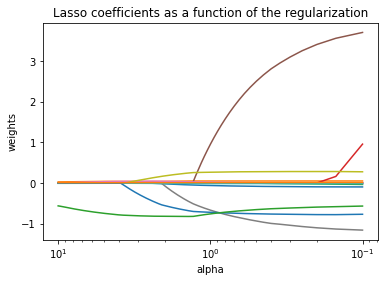

In [38]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show();

In [163]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)

In [164]:
reviews_train = load_files(
    "aclImdb/train",
    categories=["pos", "neg"],
)
text_train, y_train = reviews_train.data, reviews_train.target

In [166]:
reviews_test = load_files(
    "aclImdb/test"
)
text_test, y_test = reviews_test.data, reviews_test.target

In [168]:
cv = CountVectorizer()
cv.fit(text_train)

CountVectorizer()

In [169]:
cv.vocabulary_

{'zero': 74609,
 'day': 16697,
 'leads': 38088,
 'you': 74324,
 'to': 67125,
 'think': 66526,
 'even': 22718,
 're': 53749,
 'why': 72965,
 'two': 68769,
 'boys': 8714,
 'young': 74334,
 'men': 42153,
 'would': 73714,
 'do': 19326,
 'what': 72703,
 'they': 66474,
 'did': 18292,
 'commit': 13616,
 'mutual': 44618,
 'suicide': 64223,
 'via': 71205,
 'slaughtering': 60766,
 'their': 66367,
 'classmates': 12694,
 'it': 34683,
 'captures': 10582,
 'must': 44560,
 'be': 6334,
 'beyond': 7145,
 'bizarre': 7518,
 'mode': 43375,
 'of': 46680,
 'being': 6663,
 'for': 25450,
 'humans': 32047,
 'who': 72904,
 'have': 30118,
 'decided': 16929,
 'withdraw': 73343,
 'from': 26180,
 'common': 13635,
 'civility': 12582,
 'in': 33004,
 'order': 47196,
 'define': 17169,
 'own': 47889,
 'world': 73651,
 'coupled': 15137,
 'destruction': 17920,
 'br': 8724,
 'is': 34585,
 'not': 46050,
 'perfect': 49221,
 'movie': 44147,
 'but': 9881,
 'given': 27619,
 'money': 43572,
 'time': 66925,
 'the': 66339,
 'filmm

In [170]:
cv.get_feature_names()

['00',
 '000',
 '0000000000001',
 '00001',
 '00015',
 '000s',
 '001',
 '003830',
 '006',
 '007',
 '0079',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00pm',
 '00s',
 '01',
 '01pm',
 '02',
 '020410',
 '029',
 '03',
 '04',
 '041',
 '05',
 '050',
 '06',
 '06th',
 '07',
 '08',
 '087',
 '089',
 '08th',
 '09',
 '0f',
 '0ne',
 '0r',
 '0s',
 '10',
 '100',
 '1000',
 '1000000',
 '10000000000000',
 '1000lb',
 '1000s',
 '1001',
 '100b',
 '100k',
 '100m',
 '100min',
 '100mph',
 '100s',
 '100th',
 '100x',
 '100yards',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '1040s',
 '105',
 '1050',
 '105lbs',
 '106',
 '106min',
 '107',
 '108',
 '109',
 '10am',
 '10lines',
 '10mil',
 '10min',
 '10minutes',
 '10p',
 '10pm',
 '10s',
 '10star',
 '10th',
 '10x',
 '10yr',
 '11',
 '110',
 '1100',
 '11001001',
 '1100ad',
 '111',
 '112',
 '1138',
 '114',
 '1146',
 '115',
 '116',
 '117',
 '11f',
 '11m',
 '11th',
 '12',
 '120',
 '1200',
 '1200f',
 '1201',
 '1202',
 '123',
 '12383499143743701',
 '1

In [171]:
X_train = cv.transform(text_train)

In [173]:
X_test = cv.transform(text_test)

In [175]:
logit =glm(n_jobs=-1, random_state=7)
logit.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=7)

In [176]:
logit.predict(X_test)

array([1, 0, 1, ..., 0, 0, 0])

In [177]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_test, y_test), 3)

(0.981, 0.864)

In [178]:
from sklearn.pipeline import make_pipeline

In [180]:
text_pipe_logit = make_pipeline(
    CountVectorizer(), glm(n_jobs=-1, random_state=7)
)

text_pipe_logit.fit(text_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression',
                 LogisticRegression(n_jobs=-1, random_state=7))])

In [181]:
param_grid_logit = {"logisticregression__C": np.logspace(-5, 0, 6)}
grid_logit = GridSearchCV(
    text_pipe_logit, param_grid_logit, cv=3, n_jobs=-1, return_train_score=True
)

grid_logit.fit(text_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(n_jobs=-1,
                                                           random_state=7))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             return_train_score=True)

In [182]:
grid_logit.best_score_

0.8855599340364303

In [183]:
grid_logit.best_params_

{'logisticregression__C': 0.1}

In [184]:
grid_logit.score(text_test, y_test)

0.87812

In [185]:
forest = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)
forest.fit(X_train, y_train)
round(forest.score(X_test, y_test), 3)

0.855

In [196]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [193]:
Pipeline?

In [190]:
pipeline?

Object `pipeline` not found.


In [198]:
from sklearn.preprocessing import PolynomialFeatures
logit_pipe = Pipeline(
    [('p',PolynomialFeatures(degree=2)), ( 'glm',LogisticRegression())]
)

In [200]:
logit_pipe['p']

PolynomialFeatures()

In [1]:
import numpy as np

In [2]:
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired);

NameError: name 'plt' is not defined

In [204]:
y

array([False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,

In [4]:
from sklearn.tree import DecisionTreeClassifier 

In [233]:
clf=DecisionTreeClassifier(max_depth=5,criterion='entropy')

In [234]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [235]:
pred=clf.predict(X)

In [236]:
pred

array([False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,

In [237]:
y

array([False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,

In [215]:
pred

array([False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,

In [238]:
y==pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

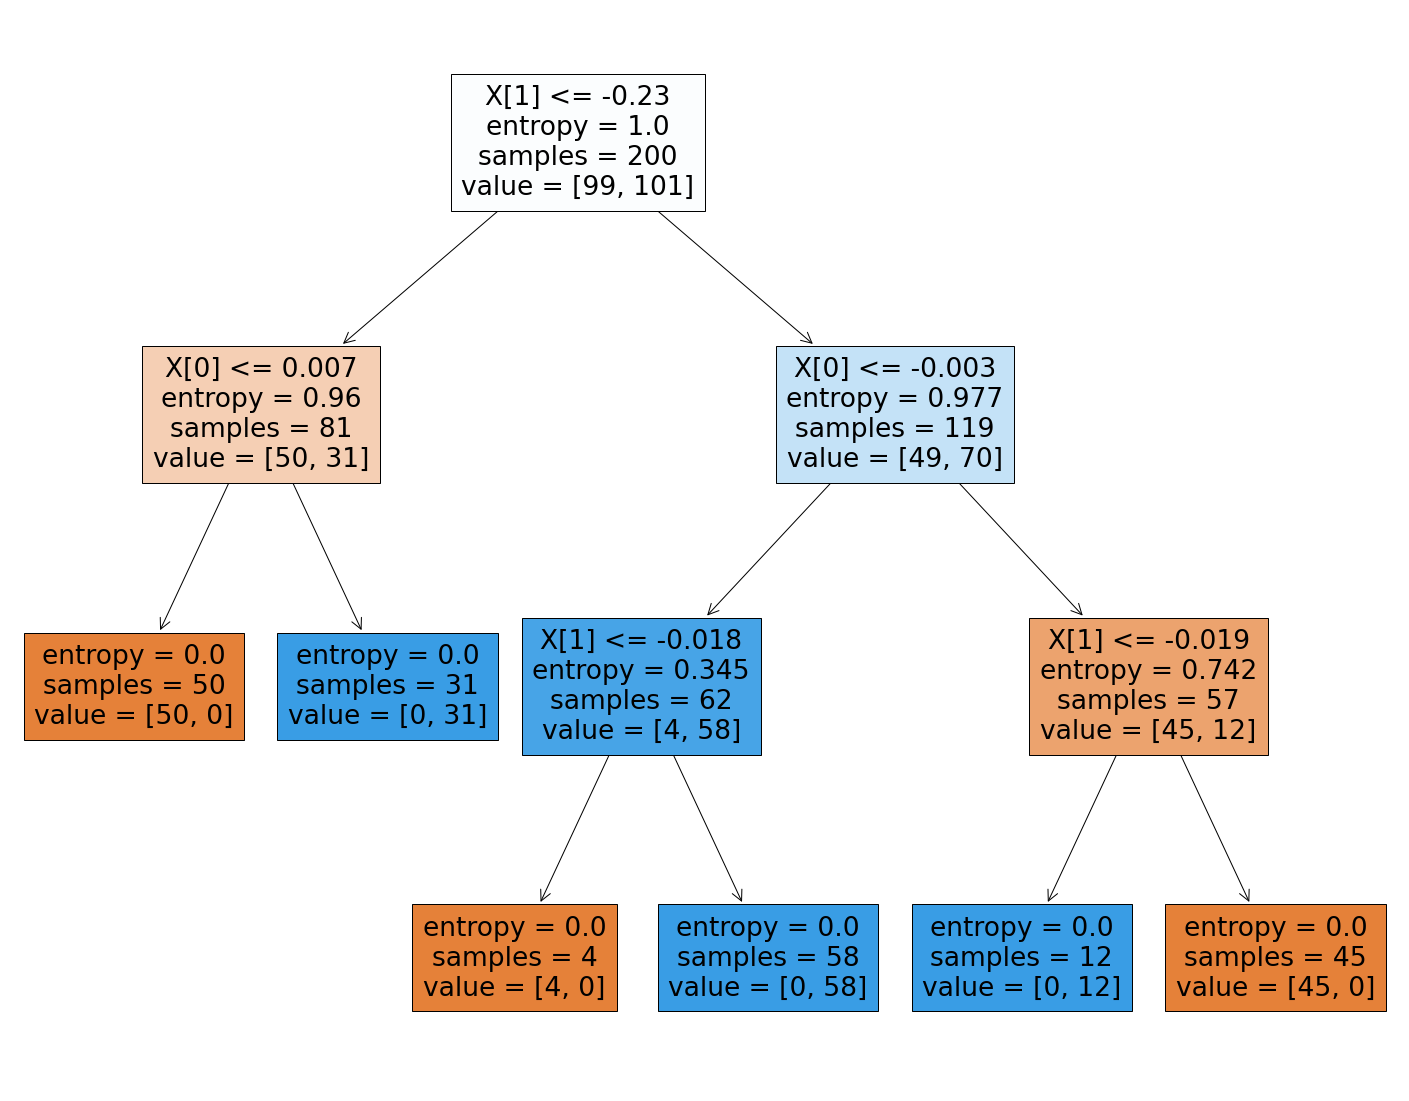

In [239]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   filled=True)

In [9]:
def plot_boundary(clf, X, y, plot_title):
    clf = CalibratedClassifierCV(clf)
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.PuOr_r,
    )
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes="--")
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);

In [12]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Temp/ipykernel_208/1732307731.py:17: UserWarning: No contour levels were found within the data range.
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes="--")
C:\Users\User\AppData\Local\Temp/ipykernel_208/1732307731.py:17: UserWarning: The following kwargs were not used by contour: 'linetypes'
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes="--")


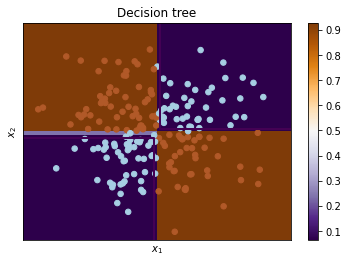

In [18]:
plot_boundary(DecisionTreeClassifier(), X, y, "Decision tree")

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression as glm
from sklearn import metrics

In [2]:
from sklearn import datasets

In [3]:
iris=datasets.load_iris()

In [5]:
from sklearn.multiclass import OneVsRestClassifier
X, y = iris.data, iris.target
# Fitting One vs. All version of linear SVM
onevsall = OneVsRestClassifier(glm()).fit(X, y)

In [8]:
metrics.accuracy_score(y, onevsall.predict(X))

0.9533333333333334

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf=DecisionTreeClassifier(max_depth=3)

In [20]:
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [21]:
metrics.accuracy_score(y, clf.predict(X))

1.0

In [22]:
 clf.predict(X)

array([False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,